# Tutorial for Strong castle model

This tutorial shows how to do simulations using strong castle model and how to fit the experimental data using this model.

In [1]:
from cdsaxs.fitter import Fitter
from cdsaxs.simulations.strong_castle import StrongCastleSimulation
import numpy as np

### Simulation

#### Prepare the data

In [2]:
pitch = 100 #nm distance between two trapezoidal bars
qzs = np.linspace(-0.5, 0.5, 201)
qxs = 2 * np.pi / pitch * np.ones_like(qzs)

#Initial parameters
dwx = 0.1
dwz = 0.1
i0 = 10
bkg = 0.1
y1 = 0.
height = 10.
bot_cd = 40.
top_cd = 20.
swa = [90., 90.0, 90.0]
overlay = 10
#fixed parameters not be fitted
n1 = 2
n2 = 1

langle = np.deg2rad(np.asarray(swa))
rangle = np.deg2rad(np.asarray(swa))


overlay_params = {'heights': height,
            'langles': langle,
            'rangles': rangle,
            'y_start': y1,
            'bot_cd': bot_cd,
            'dwx': dwx,
            'dwz': dwz,
            'i0': i0,
            'bkg_cste': bkg,
            'overlay': overlay,
            'top_cd': top_cd,
            'n1': n1,
            'n2': n2,
            }


There are only 4 parameters that are different from the stacked trapezoid model, namely `overlay`, `top_cd`, `n1` and `n2.

So the above parameters give us the following cross section:

![overlay](../../../assets/images/overlay_ex.png)




`n1` and `n2` correspond to the number of trapezoids in the bottom and top part of the model respectively. 

 Discussion about other parameters can be found in the [stacked trapezoid model tutorial.](https://github.com/CEA-MetroCarac/cdsaxs/blob/main/Tutorials/stacked_trapezoid_simulation_and_fitting.ipynb)
 

Now we will calculate the intensity exactly with strong castle model and plot the data.

Text(0.5, 1.0, 'Stacked Trapezoid diffraction simulation')

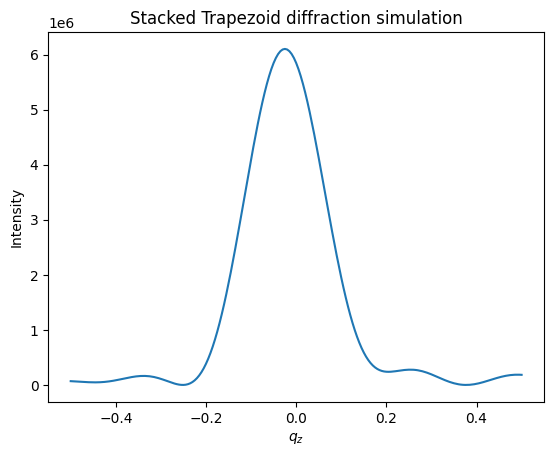

In [3]:
Simulation1 = StrongCastleSimulation(qys=qxs, qzs=qzs)

intensity = Simulation1.simulate_diffraction(params=overlay_params)

#plot
import matplotlib.pyplot as plt
plt.plot(qzs, intensity)
plt.xlabel(r'$q_{z}$')
plt.ylabel('Intensity')
plt.title('Stacked Trapezoid diffraction simulation')

## Fitting

We will do exactly the same steps as in the [stacked trapezoid model tutorial.](../Tutorials/stacked_trapezoid_simulation_and_fitting.ipynb) We will use the calculated intensities above as experimental and fit them with the strong castle model.

    height1   langle1   langle2   langle3  rangle1   rangle2   rangle3  \
0  10.03779  1.651405  1.480153  1.592135  1.54748  1.708779  1.546373   

    y_start     bot_cd       dwx       dwz         i0  bkg_cste   overlay  \
0  0.017236  40.000198  0.098872  0.100022  10.000337  0.099607  9.962454   

      top_cd  
0  19.999823  


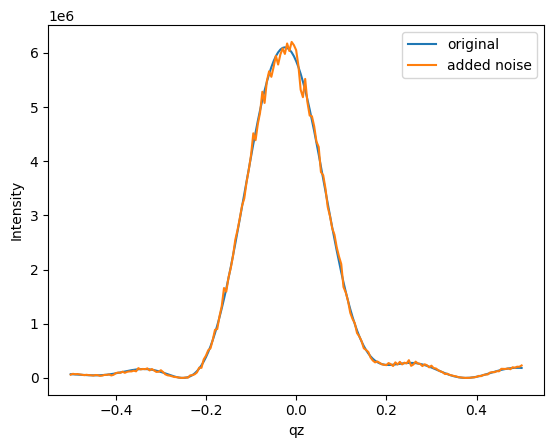

In [4]:
import matplotlib.pyplot as plt
intensity_noisy = intensity + np.sqrt(intensity) * np.random.normal(0, 50, intensity.shape)
plt.plot(qzs, intensity, label='original')
plt.plot(qzs, intensity_noisy, label='added noise')
plt.ylabel('Intensity')
plt.xlabel('qz')
plt.legend()


initial_params = {'heights': {'value': height, 'variation': 10E-3},
                    'langles': {'value': langle, 'variation': 10E-3},
                    'rangles': {'value': rangle, 'variation': 10E-3},
                    'y_start': {'value': y1, 'variation': 10E-3},
                    'bot_cd': {'value': bot_cd, 'variation': 10E-3},
                    'dwx': {'value': dwx, 'variation': 10E-5},
                    'dwz': {'value': dwz, 'variation': 10E-5},
                    'i0': {'value': i0, 'variation': 10E-5},
                    'bkg_cste': {'value': bkg, 'variation': 10E-5},
                    'overlay': {'value': overlay, 'variation': 10E-3},
                    'top_cd': {'value': top_cd, 'variation': 10E-3},
                    'n1': n1,
                    'n2': n2,
                    }

StrongCastle1 = StrongCastleSimulation(qys=qxs, qzs=qzs, initial_guess=initial_params)

Fitter1 = Fitter(Simulation=StrongCastle1, exp_data=intensity_noisy)

bestfit,fitness = Fitter1.cmaes(sigma=10, ngen=100, popsize=1000, mu=10, n_default=15, restarts=10, tolhistfun=10E-5, ftarget=10, restart_from_best=True, verbose=False)

print(bestfit)


In [5]:
with np.errstate(divide='ignore', invalid='ignore'):
    stats = Fitter1.mcmc_bestfit_stats(N=15, sigma = 100., nsteps=200, nwalkers=1000)

print(stats)

15 parameters


100%|██████████| 200/200 [00:19<00:00, 10.10it/s]


               mean       std  count        min        max   lower_ci  \
height1   10.032762  0.154237  99987   8.643961  14.159510  10.031506   
langle1    1.623662  0.050105  99987   0.190842   3.043659   1.623254   
langle2    1.519561  0.066288  99987   0.058702   2.991455   1.519021   
langle3    1.565897  0.066249  99987   0.156458   3.109113   1.565357   
rangle1    1.489218  0.065244  99987   0.503257   2.847647   1.488687   
rangle2    1.699659  0.067377  99987   0.002289   2.783351   1.699110   
rangle3    1.529950  0.067966  99987   0.387656   3.065067   1.529396   
y_start    0.457200  0.089482  99987   0.001071   1.319225   0.456471   
bot_cd    39.984972  0.140185  99987  37.437256  41.138759  39.983830   
dwx        0.098333  0.000941  99987   0.070365   0.127836   0.098326   
dwz        0.100564  0.000768  99987   0.066336   0.108642   0.100558   
i0        10.000036  0.000861  99987   9.958191  10.012195  10.000029   
bkg_cste   0.099234  0.001000  99987   0.083602   0